#  Twitter Sentiment Analysis on Company Stock - Sentiment Analysis with Neural Networks and VADER 


## Jan Francis Mitchell Barlaan

### Student ID: 011282929

### A1: Research Question

* Using neural networks such as LSTM combined with other sentiment analysis techniques such as VADER, can we create a model that can accurately predict people's current sentiments and feelings towards investing in a company's stock, whether positive or negative, based on social media texts such as their tweets?

### A2: Context and Justification

*	Creating a model based on neural networks and VADER that can accurately conduct sentiment analysis on texts such as social media tweets can help gauge overall public opinion on company stocks. Those with positive sentiments may be worth investing in at that moment, while those carrying more negative public sentiments should be treated more cautiously when investing.
*	Combining Lexicon-based methods such as VADER with neural networks such as CNN-LSTMs is advantageous due to its hybrid nature. Lexicon-based methods rely on predefined dictionaries and provide a foundation for understanding sentiment, particularly for domain-specific language or less-trained deep-learning models. VADER is particularly suited to social media texts such as Tweets (Adam, 2023).
*	Conversely, CNN-LSTM models excel at capturing contextual information and dependencies in text sequences. These types of networks can capture the nuances of language, including irony, sarcasm, and context-dependent meanings, which lexicons may struggle to process.
*	For example, a customer review could say, "The product is great, but the customer service was horrible." VADER might identify "great" as positive and "horrible" as negative. An LSTM network, however, can understand the context and relationship between these words, potentially recognizing that the overall sentiment of the review is negative due to the customer service experience. 
*	Further study and application of a model based on this type of sentiment analysis can be combined with forecasting methods such as time series analysis or even basic linear regression to determine whether a correlation of some sort exists between the current public opinion of a company/stock and whether the closing price of that stock increased or decreased relative to its opening price, however, for this capstone project, only the sentiment analysis portion will be conducted.


### A3: Hypotheses

*	Null hypothesis (H0) - Using neural networks and VADER, we cannot create a model that can accurately predict the sentiment behind a tweet or review with at least 70% accuracy. 
*	Alternate Hypothesis (H1) - Using neural networks and VADER, we can successfully create a model that can accurately predict the sentiment behind a tweet or review with at least 70% accuracy. 
                  

### B1: Data Collection

*	The Twitter data used in this analysis was obtained publicly through Kaggle and is stored in a CSV format. The raw data is composed of 80,794 different rows and four columns, with the first row being the header. Each row comprises the following columns: the Date, Tweet, Stock Name, and Company Name (Yukhymenko, 2022).
*	An advantage this dataset holds is that it consists of 80,793 observations involving different companies. 
*	One disadvantage of this dataset is that it only covers sentiments from one social media platform, Twitter. This disadvantage can lend itself to a potential social media platform bias.
*	The rubric specifies challenges regarding the collection of the data. However,  no real challenge was encountered or found in acquiring the dataset through Kaggle since it simply entailed downloading the compressed zip file and extracting the folder containing the necessary CSV file into the preferred directories on the system. 


### C: Data Extraction and Preparation

* Several tools and functions were used within the Jupyter Notebooks IDE using Python kernel, but the main tools used involved VADER, Tensorflow/Keras, NLTK, pandas, matplotlib, and seaborn.
*	VADER, Tensorflow/Keras, and NLTK were used for preparation and later analysis. Pandas, matplotlib, and seaborn were used in data visualization tasks.
*	The steps below are outlined to describe the sequence of data extraction and preparation.


#### C1a: Steps to prepare the data
*	Necessary packages and the beginning dataset were imported
*	EDA was performed
*	Data cleaning was performed
*	Vocabulary size was determined
*	VADER Sentiment Intensity Analyzer was used to label the tweet sentiments
*	Plot the value counts of the sentiments to visualize the distribution
*	The proposed word embedding length was determined
*	Maximum sequence length was determined
*	Data tokenization
*	Data padding
*	Determined the number of categories
*	Data was split into training, validation, and test sets
*	Train, test, validation, and whole cleaned data sets were saved into individual CSV files


* The code below is used to perform all of the data preparation steps described above.

#### C1b: Data Cleaning and Exploration


* The following packages were imported and used in the processes of both preparing and analyzing the data.

In [23]:
# Import necessary packages 

import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
import seaborn as sns

import re

import tensorflow as tf

import keras

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model


import warnings
warnings.filterwarnings("ignore")



* Only one CSV required importation for this analysis, the stock_tweets.csv file, which was obtained from Kaggle.

In [25]:
#Import csv

df = pd.read_csv(r"C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D214\Stock Tweets for Sentiment Analysis and Prediction\stock_tweets.csv") 



* After the importation of the csv, the data frame was observed via the head, info, and shape functions in order to validate the structure.

In [27]:
#Preview dataframe

df

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [28]:
# Validates the structure and displays the first 5 rows of the new dataframe  

df.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [29]:
# Shows the number of observations and variables (rows and columns)

df.shape

(80793, 4)

In [30]:
# Shows information about the dataframe such as types, etc.


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          80793 non-null  object
 1   Tweet         80793 non-null  object
 2   Stock Name    80793 non-null  object
 3   Company Name  80793 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


* Next, we check for the presence of duplicates.

In [32]:
#Check for duplicates

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
80788    False
80789    False
80790    False
80791    False
80792    False
Length: 80793, dtype: bool

In [33]:
#Show number of duplicates. False = no duplicates

print(df.duplicated().value_counts())

False    80793
Name: count, dtype: int64


* No duplicate entries were found. Therefore, we moved on to check for nulls.

In [35]:
#Count of null/missing values in each column

df.isnull().sum()

Date            0
Tweet           0
Stock Name      0
Company Name    0
dtype: int64

* No nulls were found, missingno was also used to confirm the lack of nulls visually.

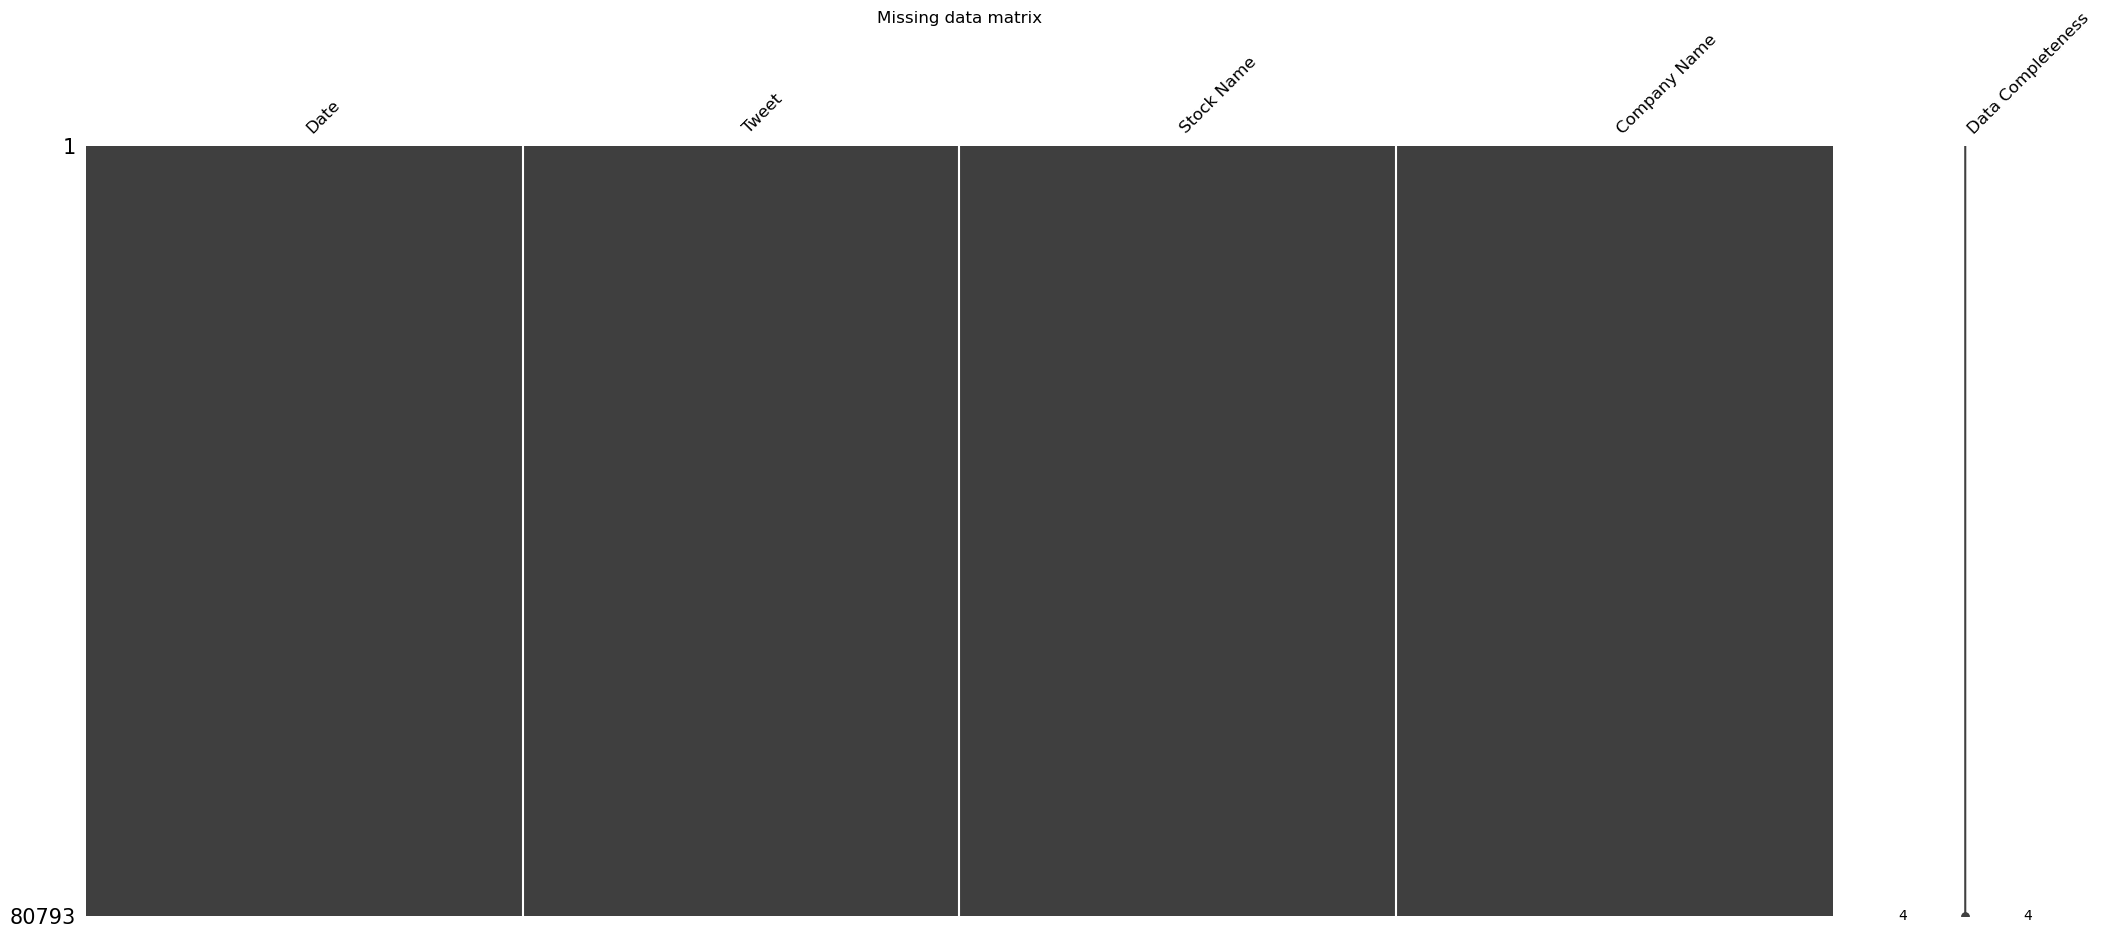

In [37]:
#Import missingno to visualize missing/null values 

import missingno as msno
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing data matrix')
plt.show()


* The following VADER Sentiment Analysis is counted as a data preparation step in the case of this specific dataset since the tweets are unlabeled regarding sentiment.

* VADER Sentiment Intensity Analyzer can label text sentiments as positive, negative, or neutral. Only positive and negative sentiments will be labeled for simplicity and the purpose of this analysis. Code from a Medium article was adapted and slightly modified to perform the following sentiment labeling (Adam, 2023).

In [40]:
# Initialize VADER sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


In [41]:
# Function to label sentiments as positive or negative (excluding neutral)

def label_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return None  # Exclude neutral sentiments



In [42]:
# Apply VADER labeling, excluding neutral sentiments

df['Sentiment'] = df['Tweet'].apply(label_sentiment)
df = df.dropna(subset=['Sentiment']).reset_index(drop=True) # Remove rows where sentiment is None

# Examine dataframe after VADER labeling
df


,Date,Tweet,Stock Name,Company Name,Sentiment
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",positive
1,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",positive
2,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",negative
3,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",negative
4,2022-09-29 22:24:22+00:00,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",negative
...,...,...,...,...,...
55941,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,positive
55942,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,positive
55943,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,positive
55944,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,positive


* Here we visualize the distribution of our positive and negative sentiments.

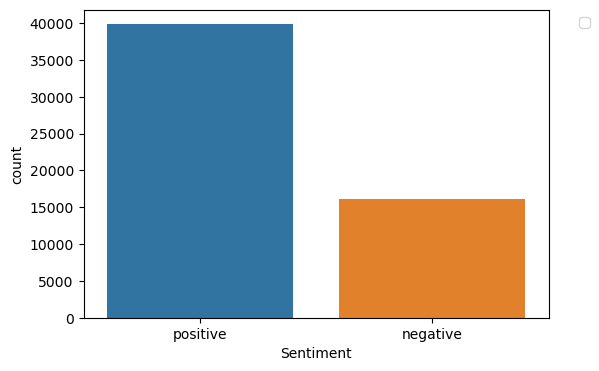

In [44]:
#Plot the value counts

plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', hue='Sentiment', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* Now that our dataset is labeled with sentiments via VADER, we can move on to the rest of the data preparation required before loading the texts into a neural network.

* Below, we detected unusual characters and changed capital letters to lowercase. Tokenization, lemmatization, and stopword removal were also included in the 'for' loop.


In [47]:
# Finding special/unusual characters


# Identify all characters contained in the Tweet column
commentary = df['Tweet']
list_of_characters = []
for comment in commentary: 
    for character in comment:
        if character not in list_of_characters:
            list_of_characters.append(character)
print(list_of_characters)

['M', 'a', 'i', 'n', 's', 't', 'r', 'e', 'm', ' ', 'd', 'h', 'o', 'z', 'g', 'j', 'b', 'w', 'p', 'l', '.', 'T', 'y', 'k', ',', 'c', 'v', '&', ';', 'I', '@', 'u', 'f', 'E', 'V', 'R', 'Y', 'O', 'N', '“', '2', '0', '”', '3', '/', '6', 'S', 'U', 'q', 'x', '$', '5', '4', '=', 'B', 'D', 'W', 'H', 'F', '!', 'G', '?', 'C', '-', '💩', ':', '8', "'", 'L', 'A', 'P', 'Z', '\n', '❤', '️', 'J', '_', '1', 'K', '7', 'X', 'Q', '’', '🧐', '9', '(', ')', '#', '—', '…', '🙄', '%', '🤝', '"', '🫣', '~', '♥', '+', '🫶', '✨', '💛', '🤖', '💦', '🤞', '🏾', '‘', '😉', '⚡', '✅', '📈', '📉', '🚗', '💻', '📱', '🔥', '💰', '🤯', '\u2066', '\u2069', '🇰', '🇷', '🏎', '💨', '[', ']', '🍻', '–', '•', '\xa0', '🚀', '🌕', '🤔', '🔒', '📢', '🤣', '😄', '🇺', '🇸', '|', '👋', '🥰', '🙏', '🔋', '👀', '*', '🤗', '🌄', '🤷', '🏻', '\u200d', '♂', '👉', '👇', '😂', '🧮', '🎁', '💪', '😵', '💫', '🙀', '🕯', '🐶', '🎊', '✌', '😭', '🐮', '😳', '⏰', '¥', '🌚', '🌏', '🎥', '🔌', '☀', '🥳', '🎉', '🏆', '💔', '💙', '💚', '🧡', '🖤', '🔻', '🇨', '🇳', '🇪', 'ü', '🤑', '🚖', '😏', '🌳', '⛰', '📸', '☹', '🤫', '🏣', 

In [48]:
from nltk.corpus import stopwords


# Create an empty list to store cleaned tweets
description_list = []

# Define the list of stopwords, specifying English as the language
stop_words = stopwords.words('english')

# Special/unusual characters will be removed by iterating over a for loop
for description in df['Tweet']: 
    
#Regular Expression can remove special characters from the string. 
#It will be in the form [^a-zA-Z0-9], where ^ represents any character except the characters in the brackets, 
##and a-zA-Z0-9 represents that string can only have small and capital alphabets and numerical digits. 
    description = re.sub("[^a-zA-Z]", " ", description) 
#Convert to lower case
    description = description.lower()
#Perform tokenization
    description=nltk.word_tokenize(description)
#Perform lemmatization
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
#Removing stopwords
    description = [word for word in description if not word in stop_words]
    description = " ".join(description)
    description_list.append(description)

* Next, we store the cleaned tweets in a list of its own and create a new dataframe.

In [50]:
# The cleaned tweets are now stored in description_list

# Create a dataframe out of this list:
description_df = pd.DataFrame(description_list, columns=['CleanTweets'])


# Append Date from the original dataframe to this new dataframe
col_to_concat = ['Date'] 

description_df = pd.concat([df[col_to_concat], description_df], axis=1)

# Append Sentiments from the original dataframe to this new dataframe
description_df = pd.concat([description_df, df['Sentiment']], axis=1)

#Append Stock Name and Company Name from the original dataframe to this new dataframe
description_df = pd.concat([description_df, df['Stock Name'], df['Company Name']], axis=1)

description_df


,Date,CleanTweets,Sentiment,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,mainstream medium ha done amazing job brainwas...,positive,TSLA,"Tesla, Inc."
1,2022-09-29 23:18:08+00:00,even include unvested rsus additional equity n...,positive,TSLA,"Tesla, Inc."
2,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha still ...,negative,TSLA,"Tesla, Inc."
3,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying kill kid sad de...,negative,TSLA,"Tesla, Inc."
4,2022-09-29 22:24:22+00:00,year wholemarsblog viciously silenced tesla cr...,negative,TSLA,"Tesla, Inc."
...,...,...,...,...,...
55941,2021-10-07 17:11:57+00:00,fastest growing tech stock market mix fintech ...,positive,XPEV,XPeng Inc.
55942,2021-10-04 17:05:59+00:00,earnings horizon quick snapshot largest increa...,positive,XPEV,XPeng Inc.
55943,2021-10-01 04:43:41+00:00,record delivery result testimony unwavering pu...,positive,XPEV,XPeng Inc.
55944,2021-10-01 00:03:32+00:00,delivered smart ev sep reaching milestone unit...,positive,XPEV,XPeng Inc.


* Below is a list of the detected stopwords from our original dataframe. 

In [52]:
#Displaying stop words

stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

*	Tokenization is used to simplify text data analysis so that a machine model can utilize the data while retaining the context. It breaks down text strings into tokens and smaller original data components. It is also an important step in preprocessing since it aids in identifying and removing both stopwords and unnecessary characters.
*	We will use Tokenizer to turn the text into tokens and determine the vocabulary size. We will also determine the tweet lengths.
*	Listed below is our vocabulary size of 56,706, which we discovered after running our code.


In [56]:
# Identify vocabulary size

tokenizer = Tokenizer()
tokenizer.fit_on_texts(description_df['CleanTweets'])

word_count = len(tokenizer.word_index) +1

print("Vocabulary_size: ", word_count)

Vocabulary_size:  56706


*	As specified below, the proposed word embedding length is 20.0, based on the tweet median length.
*	Also, the maximum sequence length is 53, justified by the tweet_max function. 


In [58]:
# Determine min, med, and max lengths of tweets 


tweet_length = []
for char_len in description_df['CleanTweets']:
    tweet_length.append(len(char_len.split(" ")))

tweet_max = np.max(tweet_length)
tweet_min = np.min(tweet_length)
tweet_median = np.median(tweet_length)

print("Max length of sequences is:", tweet_max)
print("Min length of sequences is:", tweet_min)
print("Median length of sequences is:", tweet_median)

# The median tweet length will be used as the proposed word embedded length here: 
print()
print("Proposed word embedding length:", tweet_median)

Max length of sequences is: 53
Min length of sequences is: 2
Median length of sequences is: 20.0

Proposed word embedding length: 20.0


In [59]:
# Display the list of all word tokens from the cleaned dataset

from nltk.tokenize import word_tokenize


description_df['CleanTweets'].apply(word_tokenize)

0        [mainstream, medium, ha, done, amazing, job, b...
1        [even, include, unvested, rsus, additional, eq...
2        [realdanodowd, wholemarsblog, tesla, hahaha, s...
3        [realdanodowd, tesla, stop, trying, kill, kid,...
4        [year, wholemarsblog, viciously, silenced, tes...
                               ...                        
55941    [fastest, growing, tech, stock, market, mix, f...
55942    [earnings, horizon, quick, snapshot, largest, ...
55943    [record, delivery, result, testimony, unwaveri...
55944    [delivered, smart, ev, sep, reaching, mileston...
55945    [xpeng, p, deliver, outstanding, performance, ...
Name: CleanTweets, Length: 55946, dtype: object

In [60]:
# Tokenization on the cleaned dataset

tokenizer = Tokenizer()
tokenizer.fit_on_texts(description_df['CleanTweets'])

word_count = len(tokenizer.word_index) + 1

print("Number of unique words:", word_count)

Number of unique words: 56706


In [61]:
# Display the list of all word tokens from the cleaned dataset

from nltk.tokenize import word_tokenize


description_df['CleanTweets'].apply(word_tokenize)

0        [mainstream, medium, ha, done, amazing, job, b...
1        [even, include, unvested, rsus, additional, eq...
2        [realdanodowd, wholemarsblog, tesla, hahaha, s...
3        [realdanodowd, tesla, stop, trying, kill, kid,...
4        [year, wholemarsblog, viciously, silenced, tes...
                               ...                        
55941    [fastest, growing, tech, stock, market, mix, f...
55942    [earnings, horizon, quick, snapshot, largest, ...
55943    [record, delivery, result, testimony, unwaveri...
55944    [delivered, smart, ev, sep, reaching, mileston...
55945    [xpeng, p, deliver, outstanding, performance, ...
Name: CleanTweets, Length: 55946, dtype: object

In [62]:
# Tokenized original dataframe for comparison to our tokenized cleaned dataframe

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Tweet'])

word_count = len(tokenizer.word_index) + 1

print("Number of unique words:", word_count)

Number of unique words: 70322


In [63]:
#  Display the list of all word tokens from the original dataset

df['Tweet'].apply(word_tokenize)

0        [Mainstream, media, has, done, an, amazing, jo...
1        [3/, Even, if, I, include, 63.0M, unvested, RS...
2        [@, RealDanODowd, @, WholeMarsBlog, @, Tesla, ...
3        [@, RealDanODowd, @, Tesla, Stop, trying, to, ...
4        [For, years, @, WholeMarsBlog, viciously, sile...
                               ...                        
55941    [Some, of, the, fastest, growing, tech, stocks...
55942    [With, earnings, on, the, horizon, ,, here, is...
55943    [Our, record, delivery, results, are, a, testi...
55944    [We, delivered, 10,412, Smart, EVs, in, Sep, 2...
55945    [Why, can, XPeng, P5, deliver, outstanding, pe...
Name: Tweet, Length: 55946, dtype: object

*	We can observe that words such as 'a', 'an', and 'the' are absent in the tokenized clean data frame. These have been removed since they provide no value as inputs in the neural network model.
*	We can split our data after data preparation, including lemmatization and tokenization. Next, we split the data into train, test, and validation sets, with an 80:20 ratio between the train and test sets and a sub-ratio of 75:25 between the train and validation sets. These ratios were chosen since they are the most common best practices ratios.


In [66]:
# Train/validation/test split
train_df, test_df = train_test_split(description_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2


*	Padding is the process in which variable length data is made uniformly through either the removal or addition of characters in a string. Now that our data is appropriately split into train, test, and validation portions, each with an X and a y component, we can pad the text sequences.

In [68]:
# Applying Padding 

X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['CleanTweets']), maxlen=tweet_max)
X_val = pad_sequences(tokenizer.texts_to_sequences(val_df['CleanTweets']), maxlen=tweet_max)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['CleanTweets']), maxlen=tweet_max)


*	After padding, we need to change the positive and negative sentiments into boolean values since the neural network we will work with deals in binary outputs.

In [70]:
# Prepare labels
y_train = np.array([1 if s == 'positive' else 0 for s in train_df['Sentiment']])
y_val = np.array([1 if s == 'positive' else 0 for s in val_df['Sentiment']])
y_test = np.array([1 if s == 'positive' else 0 for s in test_df['Sentiment']])


*	One-hot encoding is necessary on the y components since models such as neural networks are best suited to numeric input.

In [72]:
# With y_test, y_val, and y_train defined, y can be one-hot encoded.
    # Re-define y_test, y_val, and y_train as such
# (StackOverflow, 2019)

from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

*	Finally, we will save our split data and the cleaned data frame into CSV files.

In [74]:
#Save train, validation, and test data to csv:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
X_val_df = pd.DataFrame(X_val)

y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)
y_val_df = pd.DataFrame(y_val)

X_train_df.to_csv('Tweet_X_train_df.csv', index=False)
X_test_df.to_csv('Tweet_X_test_df.csv', index=False)
X_val_df.to_csv('Tweet_X_val_df.csv', index=False)
y_train_df.to_csv('Tweet_y_train_df.csv', index=False)
y_test_df.to_csv('Tweet_y_test_df.csv', index=False)
y_val_df.to_csv('Tweet_y_val_df.csv', index=False)

#Save cleaned df (description_df) to csv
description_df = pd.DataFrame(description_df)

description_df.to_csv('Tweet_description_df.csv', index=False)

#### C1c: Advantage and Disadvantage of Chosen Extraction and Preparation Techniques

*	One advantage of the VADER Sentiment Intensity Analyzer technique used to label the sentiments of unlabeled tweets is that it is optimized for social media text, even texts containing abbreviations, emojis, and slang.
*	One disadvantage of VADER is that it can misinterpret sarcasm and irony, leading to incorrect sentiment classification. VADER was used at the very beginning to establish the initial sentiments on the raw dataset. Therefore, if any of these sentiment classifications are wrong or inaccurate, then the potential for those errors to persist and exacerbate through further model construction and training is now present.


### D: Analysis

*	The chosen model is based on sequential text classification. The final model structure is most accurately described as a CNN-Bidirectional LSTM, a convoluted neural network involving at least one layer of Bidirectional Long Short-Term Memory. LSTMs are a special kind of Recurrent Neural Network (RNN) capable of learning long-term dependencies in data. Bidirectional LSTM layers were employed since they account for past and future data points for every step.
*	The CNN portion in the final model is present due to the inclusion of a Conv1D Layer used for one-dimensional convolutional operations, typically applied to sequences like text data.
*	The inclusion of a convolutional layer (CNNs) prior to recurrent layers (RNNs) enables the detection of local patterns within sequences at high efficiencies. In contrast, the recurrent LSTM layers capture long-term dependencies and the data's sequential nature.
*	These networks can be trained to make predictions based on the sentiments and sequences of text present in our starting dataset (Luay, 2023).
*	One advantage of LSTMs is their ability to capture past context.
*	However, an inherent weakness/disadvantage is that there are several applications where future context is just as important, and a simple LSTM cannot capture this future context. This weakness was why the Bidirectional version was used for the LSTM layers. 


#### D1a: Model Summary
*	Keras/Tensorflow is used to create the model. The code to set the model parameters and instantiate it is displayed below. The model output and its summary are also included. 

In [81]:
#CNN-Bidirectional LSTM model

activation = 'sigmoid'
loss = 'binary_crossentropy'
optimizer = 'adam'
num_epochs = 20

# Define early stopping monitor. 
early_stopping_monitor = EarlyStopping(patience=3)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(int(tweet_max),)), 
    tf.keras.layers.Embedding(word_count, tweet_max, input_length=tweet_max),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=5),
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=True, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=keras.regularizers.l2(0.001))),
    tf.keras.layers.Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=keras.regularizers.l2(0.001))),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation=activation)
])

# Compilation of our model. The metric we have chosen is accuracy
model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])


# Summary statistics of our model
model.summary()


# Model training
history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_val, y_val), 
                    callbacks=[early_stopping_monitor], verbose=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 53, 53)         │     3,727,066 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 51, 64)         │        10,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 10, 200)        │       132,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 200)            │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,135,358 (15.78 MB)

 Trainable params: 4,135,358 (15.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7329 - loss: 0.7945 - val_accuracy: 0.8722 - val_loss: 0.3294
Epoch 2/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9043 - loss: 0.2777 - val_accuracy: 0.8867 - val_loss: 0.2973
Epoch 3/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9414 - loss: 0.1807 - val_accuracy: 0.8869 - val_loss: 0.3478
Epoch 4/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9579 - loss: 0.1384 - val_accuracy: 0.8870 - val_loss: 0.3433
Epoch 5/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9711 - loss: 0.1009 - val_accuracy: 0.8845 - val_loss: 0.3641


#### D1b: Network Architecture

##### Excluding the first Input layer, nine layers compose the network

* Layer 1: Embedding parameters: 3,727,066

* Layer 2: Conv1D parameters: 10,240 

* Layer 3: MaxPooling1D parameters: 0

* Layer 4: Bidirectional (LSTM) parameters: 132,000

* Layer 5: Bidirectional (LSTM) parameters: 240,800

* Layer 6: Dense parameters: 20,100

* Layer 7: Dropout parameters: 0

* Layer 8: Dense parameters: 5,050

* Layer 9: Dense parameters: 102

##### There are a total number of 4,135,358 parameters, which are all trainable.


#### D2: Hyperparameters

##### D2a: Activation functions
*	Sigmoid was chosen for our activation function since it best suits binary data.

##### D2b: Number of nodes per layer
*	Three layers contain nodes. The first one contains 100, the second has 50 nodes, and the third contains two nodes. 

##### D2c: Loss function
*	Sentiment values being binary led to using binary crossentropy as the best loss function.

##### D2d: Optimizer
*	Adam is commonly used as the optimization algorithm due to its efficiency and ease of implementation.

##### D2e: Stopping criteria
*	Stopping criteria are employed so that overfitting does not occur on the training set. Overfitting can lead to high training accuracy but low test accuracy. The patience was set to 3 so that the model would not exceed running 3 times without a noticeable improvement to the model. Training will stop if there is no model improvement within the set limit discussed prior.

##### D2f: Model Fitness and Evaluation metric
*	The model fitness was based on the chosen criteria of accuracy, which is calculated with the code below. The accuracies for the training, validation, and test sets were calculated.

In [90]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss:, {loss:.4f}')


350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8856 - loss: 0.3696
Test Accuracy: 0.8880
Test Loss:, 0.3564


In [91]:
# Model accuracy - test data: 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', {score[1]})

# For comparison, model accuracy of the train data:  
score = model.evaluate(X_train, y_train, verbose=0)
print('Train accuracy:', {score[1]})

# For comparison, model accuracy of the validation data:  
score = model.evaluate(X_val, y_val, verbose=0)
print('Validation accuracy:', {score[1]})

Test accuracy: {0.8880250453948975}
Train accuracy: {0.9866237640380859}
Validation accuracy: {0.8845294713973999}


#### D3: Plots of Model Accuracy and Loss

##### D3a: Plot of Accuracy 

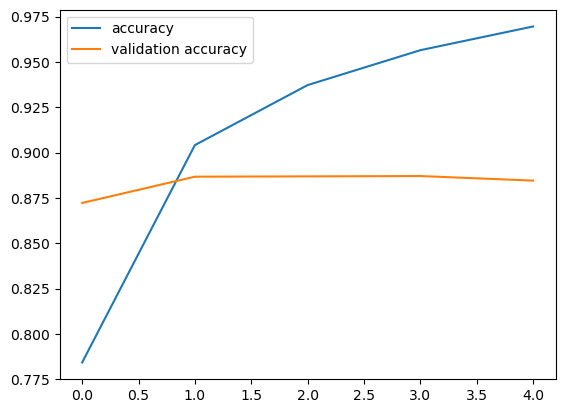

In [94]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

##### D3b: Plot of Loss 

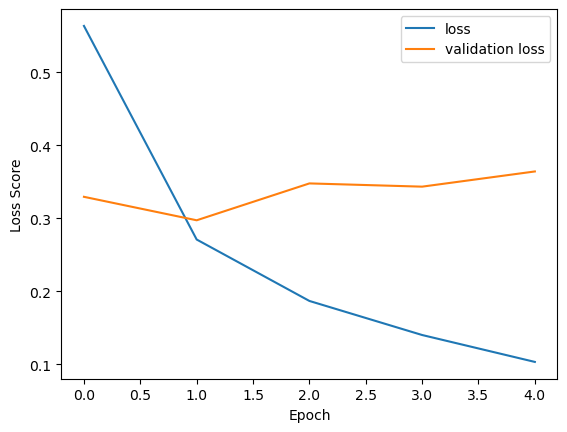

In [96]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Score')
plt.legend()
plt.show()

#### D4: Predictive Accuracy
*	The model's predictive accuracy is its calculated test accuracy, which is 0.8873.

#### D5: Saving the Trained Network

*	The following code is used to save the trained network within the neural network.

In [100]:
model.save('Capstone-CNN-LSTM-SentimentAnalysisModel.keras')

In [101]:
#Predictions and Output
predictions = model.predict(X_test)
predicted_labels = ['positive' if p[0] < p[1] else 'negative' for p in predictions]

output_df = pd.DataFrame({'CleanTweets': test_df['CleanTweets'], 
                            'Actual_Sentiment': test_df['Sentiment'],
                            'Predicted_Sentiment': predicted_labels})

output_df

350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


,CleanTweets,Actual_Sentiment,Predicted_Sentiment
40981,published new plan thought cpi aapl bitcoin en...,positive,positive
6936,know many excited today rally market remember ...,negative,negative
55089,breaking nio et vehicle found cure covid varia...,positive,positive
22678,ev space stock heating hope get allocated rivi...,positive,positive
54494,nio aim achieve break even q first annual prof...,positive,positive
...,...,...,...
21155,great news tesla model plaid led way v lithium...,positive,positive
6433,tsla china may delivery slightly better expect...,positive,positive
53971,china security regulatory commission china sec...,positive,positive
17231,realmeetkevin tesla thank god kid walked room ...,positive,positive


In [102]:
output_df['CleanTweets'] = df['Tweet']

output_df = output_df.rename(columns={'CleanTweets': 'Tweet'})

output_df

,Tweet,Actual_Sentiment,Predicted_Sentiment
40981,"Published new plan thoughts on CPI, $AAPL and ...",positive,positive
6936,I know many are excited today for this rally i...,negative,negative
55089,BREAKING: NIO ET5 vehicle found to cure Covid-...,positive,positive
22678,EV space and stocks are heating up. I hope I g...,positive,positive
54494,$NIO - Aims to achieve break-even in Q4 2023 w...,positive,positive
...,...,...,...
21155,GREAT NEWS: Tesla Model S Plaid led the way wi...,positive,positive
6433,$TSLA China May deliveries slightly better tha...,positive,positive
53971,China Securities Regulatory Commission: The Ch...,positive,positive
17231,@realMeetKevin @Tesla Thank god my kid just wa...,positive,positive


In [103]:
test_df['CleanTweets'] = output_df['Tweet']

test_df = test_df.rename(columns={'CleanTweets': 'Tweet'})

test_df['Sentiment'] = output_df['Actual_Sentiment']

test_df = test_df.rename(columns={'Sentiment': 'Actual_Sentiment'})

new_column = output_df['Predicted_Sentiment']
position = 2

test_df.insert(position, 'Predicted_Sentiment', new_column)

test_df

,Date,Tweet,Predicted_Sentiment,Actual_Sentiment,Stock Name,Company Name
40981,2022-05-11 18:40:19+00:00,"Published new plan thoughts on CPI, $AAPL and ...",positive,positive,AAPL,Apple Inc.
6936,2022-06-02 16:28:52+00:00,I know many are excited today for this rally i...,negative,negative,TSLA,"Tesla, Inc."
55089,2021-12-22 23:34:40+00:00,BREAKING: NIO ET5 vehicle found to cure Covid-...,positive,positive,NIO,NIO Inc.
22678,2021-11-09 12:14:28+00:00,EV space and stocks are heating up. I hope I g...,positive,positive,TSLA,"Tesla, Inc."
54494,2022-03-25 08:45:10+00:00,$NIO - Aims to achieve break-even in Q4 2023 w...,positive,positive,NIO,NIO Inc.
...,...,...,...,...,...,...
21155,2021-11-28 13:21:16+00:00,GREAT NEWS: Tesla Model S Plaid led the way wi...,positive,positive,TSLA,"Tesla, Inc."
6433,2022-06-09 08:29:44+00:00,$TSLA China May deliveries slightly better tha...,positive,positive,TSLA,"Tesla, Inc."
53971,2022-08-26 12:08:28+00:00,China Securities Regulatory Commission: The Ch...,positive,positive,NIO,NIO Inc.
17231,2022-01-16 00:45:33+00:00,@realMeetKevin @Tesla Thank god my kid just wa...,positive,positive,TSLA,"Tesla, Inc."


In [104]:
predictions_df = test_df

predictions_df

,Date,Tweet,Predicted_Sentiment,Actual_Sentiment,Stock Name,Company Name
40981,2022-05-11 18:40:19+00:00,"Published new plan thoughts on CPI, $AAPL and ...",positive,positive,AAPL,Apple Inc.
6936,2022-06-02 16:28:52+00:00,I know many are excited today for this rally i...,negative,negative,TSLA,"Tesla, Inc."
55089,2021-12-22 23:34:40+00:00,BREAKING: NIO ET5 vehicle found to cure Covid-...,positive,positive,NIO,NIO Inc.
22678,2021-11-09 12:14:28+00:00,EV space and stocks are heating up. I hope I g...,positive,positive,TSLA,"Tesla, Inc."
54494,2022-03-25 08:45:10+00:00,$NIO - Aims to achieve break-even in Q4 2023 w...,positive,positive,NIO,NIO Inc.
...,...,...,...,...,...,...
21155,2021-11-28 13:21:16+00:00,GREAT NEWS: Tesla Model S Plaid led the way wi...,positive,positive,TSLA,"Tesla, Inc."
6433,2022-06-09 08:29:44+00:00,$TSLA China May deliveries slightly better tha...,positive,positive,TSLA,"Tesla, Inc."
53971,2022-08-26 12:08:28+00:00,China Securities Regulatory Commission: The Ch...,positive,positive,NIO,NIO Inc.
17231,2022-01-16 00:45:33+00:00,@realMeetKevin @Tesla Thank god my kid just wa...,positive,positive,TSLA,"Tesla, Inc."


In [105]:
#Save output_df containing both Actual and Predicted Sentiments to csv

predictions_df.to_csv('predictions_df.csv', index=False)

### E: Data Summary and Implications

#### E1: Results and Implications
*	The dataset used to create this model was initially composed of 80,793 rows of tweets regarding several publicly traded companies and their stock. After initial positive/negative sentiment labeling with VADER's Sentiment Intensity Analyzer, the model was trained on 80% of the overall dataset and tested on the remaining 20% (half of this was used for validation). The constructed model could predict sentiment with an accuracy of about 98.6% on the train set, about 88.7% on the validation set, and about 88.7% again on the test set. Test loss was about 35.8%. The overall neural network architecture and the chosen set of hyperparameters contributed to these scores. Further optimization may increase the accuracy. However, the accuracy of all three split components of the data is already relatively high. Therefore, an even larger dataset to train on may yield more gains in comparison to hyperparameter optimization.

*	In the context of the original research question and the initial model built to answer it, using neural networks and VADER, we can successfully create a model that can accurately predict the sentiment behind a tweet or review with at least 70% accuracy. Therefore, we can reject the null and accept the alternative hypothesis since our accuracies between the train, test, and validation sets all score significantly above 70% accuracy.

#### E2: Limitation of Chosen Analysis
* 	One major limitation of the chosen analysis stems from the initial sentiment labeling performed by VADER's Sentiment Intensity Analyzer. This step was unavoidable and necessary since the tweets in the raw data set had no prior sentiment labeling applied to them. VADER was one of the best choices for this task since its strength lies in handling social media texts and their associated nuances. In a worst-case scenario, improper/inaccurate labeling of VADER could lead to bigger trickle-down effects as the data is fed into more complicated models, such as the neural networks we employed. However, this inherent weakness was also the reason for selecting a combination of convoluted and recurrent neural network features. Hybrid solutions between VADER and these neural network architectures were chosen to use the strength of one to cover the inherent weakness of another in a complementary fashion. 

#### E3: Recommended Course of Action Based on Results
* 	According to the results of the analyses, the hybrid approach using lexicon-based tools such as VADER in combination with neural networks is quite capable of creating a model with high accuracy for sentiment analysis. We will treat this as proof-of-concept verification and recommend exploring other similar lexicon-neural network solutions. One neural network architecture we may be interested in attempting this approach with is Transformers. One intriguing key feature of this specific architecture is that it can parallel processes and uses an attention mechanism that focuses on different parts of the input sequence when making predictions. For example, this allows it to learn relationships between words that might be far apart in a sentence.

#### E4: Future Study and Further Applications
*	As mentioned in the introduction, further study and application of a model based on this type of sentiment analysis can be combined with forecasting methods. One example would be time series analysis. It would also be interesting to see the results of combining the results of a sentiment analysis such as this one with basic linear regression. Regardless of the method used, it would prove insightful to determine whether a correlation exists between the current public opinion of a company/stock and whether that stock's closing price increased or decreased relative to its opening price.
*	Another implementation building upon the model we created could come in the form of a churn analysis and its relationship with the public perception of a company based on the sentiment analysis results.
*	Whether the further implementation of a sentiment analysis model such as the one we created is used for finance/company stock applications or used in conducting studies into the state of a company's PR, rate of churn, and many other applications, it proves itself as a handy tool in business and data analysis.


### F: Sources

#### F1: Sources for Third-Party Code 
* Adam, F. M. (2023, July 1). Sentiment analysis with vader: Analyzing twitter sentiment. Medium. https://medium.com/@vafaisalm93/sentiment-analysis-with-vader-analyzing-twitter-sentiment-86ae8078dacb 
* Luay, M. (2023, September 22). Sentiment analysis using recurrent neural network(rnn),long short term memory(lstm) and... Medium. https://medium.com/@muhammadluay45/sentiment-analysis-using-recurrent-neural-network-rnn-long-short-term-memory-lstm-and-38d6e670173f 

#### F2: Sources for In-Text Citations
* Adam, F. M. (2023, July 1). Sentiment analysis with vader: Analyzing twitter sentiment. Medium. https://medium.com/@vafaisalm93/sentiment-analysis-with-vader-analyzing-twitter-sentiment-86ae8078dacb 
* Luay, M. (2023, September 22). Sentiment analysis using recurrent neural network(rnn),long short term memory(lstm) and... Medium. https://medium.com/@muhammadluay45/sentiment-analysis-using-recurrent-neural-network-rnn-long-short-term-memory-lstm-and-38d6e670173f
* Yukhymenko, H. (2022, December 5). Stock tweets for sentiment analysis and prediction. Kaggle. https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction/data?select=stock_tweets.csv 
